<a href="https://colab.research.google.com/github/gabrielaagu/Data-Science/blob/main/Introducci%C3%B3n%20a%20los%20sistemas%20de%20recuperaci%C3%B3n%20de%20informaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PEC 2. Introducción a los sistemas de recuperación de la información.

En esta PEC vamos a desarrollar un sistema de recuperación de la información básico. Partiendo de una lista de documentos de texto, deberás utilizar las técnicas de recuperación de la información vistas en la asignatura para obtener, procesar y analizar datos útiles a partir del contenido.


## Ejercicio 3: tareas básicas

Además de las ya clásicas `pandas` y `numpy`, utilizaremos la librería [NLTK](https://es.wikipedia.org/wiki/NLTK) (Natural Language Toolkit), una librería de Python utilizada para analizar texto y aprendizaje automático.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 3.1 Separando las palabras (Tokenización)

El significado de cada sentencia se obtiene de las palabras que contiene. Así que analizando las palabras presentes en un texto puede interpretarse el significado. Así que lo primero que hay que hacer para tratar el texto es separar las palabras que lo componen, es decir, hacer una lista de palabras. El modelo que utilizaremos aquí se denomina [**bolsa-de-palabras**](https://es.wikipedia.org/wiki/Modelo_bolsa_de_palabras) (bag-of-words) ya que nos interesan las palabras sin importar su posición o importancia en el documento.

La separación de las palabras o tokenización consiste en separar el texto en palabras, también llamadas tokens. Generalmente, el "espacio" se utiliza para separar palabras y elementos como los puntos, comas, dos puntos, etc., se utilizan para separar frases.

Existen múltiples formas de realizar la separación de palabras para un texto determinado.

### 3.1.1 Funciones de Python

Se puede utilizar la función `split()` para separar una cadena de texto en una lista de palabras. De forma predeterminada, `split()` utiliza el espacio en blanco, aunque se puede utilizar cualquier carácter.

In [ ]:
text01 = "This sentence is the initial example text that illustrates the concept we're discussing."
text01.split(' ')

['This',
 'sentence',
 'is',
 'the',
 'initial',
 'example',
 'text',
 'that',
 'illustrates',
 'the',
 'concept',
 "we're",
 'discussing.']

El método `split()` de Python no considera los signos de puntuación como elementos separados.

### 3.1.2 Expresiones regulares

El módulo `re` ofrece un conjunto de funciones para buscar coincidencias en una cadena de texto. Una *expresión regular* es una secuencia de caracteres que definen un patrón de búsqueda.

In [ ]:
import re

text02 = """There are multiple ways we can perform tokenization on given text data. We can choose any method based on language, library and purpose of modeling."""

# TODO: Utiliza una expresión regular para separar las palabras utilizando la librería re

# Regex para separar las palabras
pattern = r'\b\w+\b'

# Aplicamos la expresión regular para encontrar todas las palabras en el texto
words = re.findall(pattern, text02)

# Mostramos las palabras encontradas
print("Palabras encontradas:", words)


Palabras encontradas: ['There', 'are', 'multiple', 'ways', 'we', 'can', 'perform', 'tokenization', 'on', 'given', 'text', 'data', 'We', 'can', 'choose', 'any', 'method', 'based', 'on', 'language', 'library', 'and', 'purpose', 'of', 'modeling']


### 3.1.3 Con NLTK

El Natural Language Toolkit (NLTK) tiene la función `word_tokenize()` para la separación de palabras y `sent_tokenize()` para la separación de frases.

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

text03 = "<p>This is the first sentence. A gallon-of-milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!</p>"

# Separar las frases
nltk.download('punkt')

# Separamos las frases utilizando sent_tokenize()
sentences = sent_tokenize(text03)

# Mostramos las frases separadas
print("Frases separadas:")
for sentence in sentences:
    print(sentence)

Frases separadas:
<p>This is the first sentence.
A gallon-of-milk in the U.S. costs $2.99.
Is this the third sentence?
Yes, it is!</p>


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 3.2. Eliminación de números y símbolos. Conversión a minúsculas

Como puede comprobarse, `word_tokenizer()` mantiene los signos de puntuación, así como los números y otros símbolos.

Una estrategia para reducir el número de palabras/tokens es convertirlas a minúsculas, puesto que algunos signos de puntuación pueden modificar la letra inicial de las palabras. De esta forma, se reduce el número de variantes de una misma palabra.

In [ ]:
import string

def remove_tags (s):
  # Eliminamos los tags html
  return re.sub(r'<.*?>', '', s)

# Eliminamos etiquetas, tokenizar, convertir a minúsculas y eliminar símbolos no alfabéticos y números:
def tokenize_and_remove_punctuations(s):
    # Eliminamos las etiquetas HTML
    s = remove_tags(s)
    s = s.lower()
    s = s.replace('-', ' ')
    # Tokenizamos el texto
    tokens = nltk.word_tokenize(s)
    # Convertimos a minúsculas y eliminar símbolos no alfabéticos y números
    clean_tokens = [token.lower() for token in tokens if token.isalpha()]
    return clean_tokens

print((tokenize_and_remove_punctuations(text03)))

['this', 'is', 'the', 'first', 'sentence', 'a', 'gallon', 'of', 'milk', 'in', 'the', 'costs', 'is', 'this', 'the', 'third', 'sentence', 'yes', 'it', 'is']


## 3.3. Palabras vacías

Las *palabras vacías* (stopwords) son las palabras más comunes en cualquier idioma, tienen sentido gramatical pero tienen un significado limitado en el análisis de un texto. Estas palabras vacías incluyen artículos, preposiciones, conjunciones, pronombres, etc., y su eliminación reduce considerablemente el número de palabras.

NLTK tiene listas de palabras vacías en 16 idiomas. En este caso, se debe cargar la lista en inglés.

In [ ]:
# TODO : dada una lista de tokens, elimina aquellos que sean palabras vacías o que tengan una longitud menor o igual a 2.
from nltk.corpus import stopwords

# Descargamos la lista de palabras vacías en inglés (una vez) y las cargamos
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    # Filtramos palabras vacías y palabras con longitud menor o igual a 2
    filtered_words = [word for word in tokens if word not in stop_words and len(word) > 2]
    return filtered_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 3.4. Normalización

Muchos idiomas contienen palabras derivadas de otros, y esto se conoce como [flexión](https://es.wikipedia.org/wiki/Flexi%C3%B3n_(ling%C3%BC%C3%ADstica)). La flexión es la modificación de una palabra para expresar diferentes categorías gramaticales como persona, número, género, etc.

El tratamiento de esta flexión para llevar las palabras a una forma base se conoce como normalización de palabras. La normalización permite que, al buscar una palabra, la búsqueda se realice simultáneamente a través de todas sus flexiones.

La **lematización** es el proceso de reducir la inflexión de las palabras para llevarlas a su forma original o raíz. El lema es la parte de la palabra a la que se añade la flexión.

En NLTK existen diferentes lematizadores disponibles, aunque aquí utilizaremos el más conocido: el [algoritmo de Porter](https://es.wikipedia.org/wiki/Algoritmo_de_Porter).

Puede encontrar más información sobre estos procesos en https://www.datacamp.com/community/tutorials/stemming-lemmatization-python.

In [ ]:
from nltk.stem import PorterStemmer

# Creamos un objeto PorterStemmer
porter = PorterStemmer()

# Obtenemos la versión normalizada de todos los tokens

def stem_words(tokens):
    stemmed_words = [porter.stem(word) for word in tokens]
    return stemmed_words

stem_words ( remove_stop_words(tokenize_and_remove_punctuations (text03)) )

['first', 'sentenc', 'gallon', 'milk', 'cost', 'third', 'sentenc', 'ye']

Una vez realizadas las operaciones básicas sobre el texto, es momento de reunirlo todo en la función `preprocess_data()` que recibe un array de pares `(documentId, text)` y aplica las transformaciones anteriormente descritas.

In [ ]:
# Función para eliminar etiquetas HTML, tokenizar, convertir a minúsculas, eliminar símbolos no alfabéticos y números, y eliminar palabras vacías
def preprocess_text(text, stem=True):
    # Eliminamos las etiquetas HTML
    text = re.sub(r'<.*?>', '', text)
    # Tokenizamos el texto
    tokens = nltk.word_tokenize(text)
    # Convertimos a minúsculas y eliminamos los símbolos no alfabéticos y números
    tokens = [token.lower() for token in tokens if token.isalpha()]
    # Eliminamos las palabras vacías
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# Función para lematizar los tokens
def stem_words(tokens):
    stemmed_words = [porter.stem(word) for word in tokens]
    return stemmed_words

def preprocess_data(contents, stem=True):
    dataDict = {}
    for documentId, text in contents:
        # Preprocesamos el texto
        tokens = preprocess_text(text)
        # Lematizamos si es necesario
        if stem:
            tokens = stem_words(tokens)
        # Agregamos el resultado al diccionario de datos
        dataDict[documentId] = tokens
    return dataDict

In [ ]:
document_1 = "I love watching movies when it's cold outside ;-)"
document_2 = "Toy Story is the best animation movie ever, I love it!"
document_3 = "Watching horror movies alone at night is really scary"
document_4 = "He loves to watch films filled with suspense and unexpected plot twists"
document_5 = "My mom loves to watch movies. My dad hates movie theaters. My brothers like any kind of movie. And I haven't watched a single movie since I got into college"
documents = [document_1, document_2, document_3, document_4, document_5]

docIds = ['doc01','doc02','doc03','doc04','doc05']

# Combinar docIds y documents
document_list = list(zip(docIds, documents))

print("Lista de documentos combinada con IDs:")
print(document_list)

# TODO : preprocesar la lista de documentos de ejemplo
data_docs = preprocess_data(document_list)

print("\nDocumentos preprocesados:")
print(data_docs)


Lista de documentos combinada con IDs:
[('doc01', "I love watching movies when it's cold outside ;-)"), ('doc02', 'Toy Story is the best animation movie ever, I love it!'), ('doc03', 'Watching horror movies alone at night is really scary'), ('doc04', 'He loves to watch films filled with suspense and unexpected plot twists'), ('doc05', "My mom loves to watch movies. My dad hates movie theaters. My brothers like any kind of movie. And I haven't watched a single movie since I got into college")]

Documentos preprocesados:
{'doc01': ['love', 'watch', 'movi', 'cold', 'outsid'], 'doc02': ['toy', 'stori', 'best', 'anim', 'movi', 'ever', 'love'], 'doc03': ['watch', 'horror', 'movi', 'alon', 'night', 'realli', 'scari'], 'doc04': ['love', 'watch', 'film', 'fill', 'suspens', 'unexpect', 'plot', 'twist'], 'doc05': ['mom', 'love', 'watch', 'movi', 'dad', 'hate', 'movi', 'theater', 'brother', 'like', 'kind', 'movi', 'watch', 'singl', 'movi', 'sinc', 'got', 'colleg']}


## 3.5. Frecuencia de las palabras

Ahora veremos la importancia de una palabra/token en los documentos.

Lo primero es obtener un vocabulario, que no es más que la lista de todos los tokens únicos que aparecen en todos los documentos.

In [ ]:
#TODO:
def get_vocabulary(data):
    # Creamos un conjunto para almacenar todos los tokens únicos
    unique_tokens = set()
    # Iteramos sobre los tokens de cada documento y agregarlos al conjunto
    for doc_tokens in data.values():
        unique_tokens.update(doc_tokens)
    # Convertimos el conjunto a una lista y devolverla
    return list(unique_tokens)

# Obtenemos el vocabulario
get_vocabulary(data_docs)

['toy',
 'watch',
 'night',
 'scari',
 'suspens',
 'horror',
 'cold',
 'alon',
 'realli',
 'movi',
 'ever',
 'twist',
 'singl',
 'anim',
 'dad',
 'got',
 'fill',
 'brother',
 'theater',
 'love',
 'best',
 'hate',
 'outsid',
 'colleg',
 'like',
 'unexpect',
 'stori',
 'film',
 'mom',
 'kind',
 'sinc',
 'plot']

Para ello, podemos calcular la frecuencia de cada término contando el número de veces que aparece en cada documento, que será una medida de su peso o importancia.

$TF (t, d) = f_{t, d}$ (número de repeticiones del término $t$ en el documento $d$)

In [ ]:
data_docs

{'doc01': ['love', 'watch', 'movi', 'cold', 'outsid'],
 'doc02': ['toy', 'stori', 'best', 'anim', 'movi', 'ever', 'love'],
 'doc03': ['watch', 'horror', 'movi', 'alon', 'night', 'realli', 'scari'],
 'doc04': ['love',
  'watch',
  'film',
  'fill',
  'suspens',
  'unexpect',
  'plot',
  'twist'],
 'doc05': ['mom',
  'love',
  'watch',
  'movi',
  'dad',
  'hate',
  'movi',
  'theater',
  'brother',
  'like',
  'kind',
  'movi',
  'watch',
  'singl',
  'movi',
  'sinc',
  'got',
  'colleg']}

In [ ]:
from nltk.probability import FreqDist

# Calculamos el tf
def calculate_tf(tokens):
    tf_score = {}
    return tf_score


fdist = calculate_tf (data_docs['doc05'])
fdist

{}

In [ ]:
from nltk.probability import FreqDist

def calculate_tf(tokens):
    tf_score = {}
    # Contamos las ocurrencias de cada término en el documento
    for token in tokens:
        tf_score[token] = tf_score.get(token, 0) + 1
    return tf_score

fdist = calculate_tf(data_docs['doc05'])
print(fdist)


{'mom': 1, 'love': 1, 'watch': 2, 'movi': 4, 'dad': 1, 'hate': 1, 'theater': 1, 'brother': 1, 'like': 1, 'kind': 1, 'singl': 1, 'sinc': 1, 'got': 1, 'colleg': 1}


La **frecuencia inversa de documentos** para un término $t$ es el logaritmo (en este caso en base 2) del cociente entre el número de documentos y el número de documentos en los que aparece el término $t$.

$ IDF (t) = log_{2} \frac{N}{\{d \in D : t \in d \}} $

Una puntuación más alta de TF*IDF indica que el término es más específico, mientras que una puntuación menor indica que es más genérico.

In [ ]:
import math

# Calculamos el idf
def calculate_idf(data):
    idf_score = {}

    # TODO: número de documentos
    total_documents = len(data)

    # TODO: obtener el vocabulario
    all_words = set(word for doc_tokens in data.values() for word in doc_tokens)

    for word in all_words:
        word_count = 0
        documents_with_term = 0
        for token_list in data.values():
            # TODO
          if word in token_list:
            documents_with_term += 1
            # TODO: calcular idf
        idf_score[word] = math.log2(total_documents / documents_with_term)
    return idf_score


idf_score = calculate_idf ( data_docs )
idf_score

{'toy': 2.321928094887362,
 'watch': 0.32192809488736235,
 'night': 2.321928094887362,
 'scari': 2.321928094887362,
 'suspens': 2.321928094887362,
 'horror': 2.321928094887362,
 'cold': 2.321928094887362,
 'alon': 2.321928094887362,
 'realli': 2.321928094887362,
 'movi': 0.32192809488736235,
 'ever': 2.321928094887362,
 'twist': 2.321928094887362,
 'singl': 2.321928094887362,
 'anim': 2.321928094887362,
 'dad': 2.321928094887362,
 'got': 2.321928094887362,
 'fill': 2.321928094887362,
 'brother': 2.321928094887362,
 'theater': 2.321928094887362,
 'love': 0.32192809488736235,
 'best': 2.321928094887362,
 'hate': 2.321928094887362,
 'outsid': 2.321928094887362,
 'colleg': 2.321928094887362,
 'like': 2.321928094887362,
 'unexpect': 2.321928094887362,
 'stori': 2.321928094887362,
 'film': 2.321928094887362,
 'mom': 2.321928094887362,
 'kind': 2.321928094887362,
 'sinc': 2.321928094887362,
 'plot': 2.321928094887362}

In [ ]:
# Función que, dado una lista de documentos, devuelve el tf_idf
def calculate_tfidf(data, idf_score):
    scores = {}
    for key, value in data.items():
        # Calculamos TF para cada documento
        tf_scores = {}
        total_terms = len(value)
        for term in set(value):
            tf_scores[term] = value.count(term) / total_terms

        # Calculamos TF-IDF para cada término
        tfidf_scores = {}
        for term, tf in tf_scores.items():
            tfidf_scores[term] = tf * idf_score.get(term, 0)

        scores[key] = tfidf_scores

    return scores

tfidf_score = calculate_tfidf ( data_docs, idf_score)
tfidf_score

{'doc01': {'cold': 0.46438561897747244,
  'movi': 0.06438561897747247,
  'watch': 0.06438561897747247,
  'love': 0.06438561897747247,
  'outsid': 0.46438561897747244},
 'doc02': {'movi': 0.045989727841051764,
  'ever': 0.33170401355533746,
  'toy': 0.33170401355533746,
  'stori': 0.33170401355533746,
  'anim': 0.33170401355533746,
  'love': 0.045989727841051764,
  'best': 0.33170401355533746},
 'doc03': {'alon': 0.33170401355533746,
  'realli': 0.33170401355533746,
  'movi': 0.045989727841051764,
  'watch': 0.045989727841051764,
  'night': 0.33170401355533746,
  'scari': 0.33170401355533746,
  'horror': 0.33170401355533746},
 'doc04': {'fill': 0.2902410118609203,
  'twist': 0.2902410118609203,
  'watch': 0.040241011860920294,
  'unexpect': 0.2902410118609203,
  'film': 0.2902410118609203,
  'suspens': 0.2902410118609203,
  'love': 0.040241011860920294,
  'plot': 0.2902410118609203},
 'doc05': {'like': 0.1289960052715201,
  'got': 0.1289960052715201,
  'movi': 0.07153957664163607,
  'si

## 3.6. Generación del espacio vectorial

Utilizando las funciones anteriores, construiremos la matriz de documentos (como filas) y términos (como columnas). Para facilitar esta tarea, utilizaremos una estructura de datos ya conocida, el **dataframe**.

In [ ]:
import pandas as pd

def generate_dataframe(data):
    # Obtenemos el vocabulario
    vocabulary = get_vocabulary(data)

    # Calculamos el TF-IDF
    tf_idf_score = calculate_tfidf(data, idf_score)

    # Creamos una lista para almacenar los datos del DataFrame
    table = []

    # Iteramos sobre cada documento
    for doc, tfidf_scores in tf_idf_score.items():
        # Creamos una lista para almacenar las puntuaciones TF-IDF para este documento
        row = []
        # Iteramos sobre cada término en el vocabulario
        for term in vocabulary:
            # Obtenemos la puntuación TF-IDF para este término en este documento (o 0 si no está presente)
            tfidf_score = tfidf_scores.get(term, 0)
            # Puntuación ala fila actual
            row.append(tfidf_score)
        # Fila ala tabla
        table.append(row)

    # DataFrame con los datos
    df = pd.DataFrame(table, columns=vocabulary, index=tf_idf_score.keys())

    return df

# Generamos el DataFrame
df_data = generate_dataframe (data_docs)
df_data.head(5)


,toy,watch,night,scari,suspens,horror,cold,alon,realli,movi,...,outsid,colleg,like,unexpect,stori,film,mom,kind,sinc,plot
doc01,0.000000,0.064386,0.000000,0.000000,0.000000,0.000000,0.464386,0.000000,0.000000,0.064386,...,0.464386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc02,0.331704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045990,...,0.000000,0.000000,0.000000,0.000000,0.331704,0.000000,0.000000,0.000000,0.000000,0.000000
doc03,0.000000,0.045990,0.331704,0.331704,0.000000,0.331704,0.000000,0.331704,0.331704,0.045990,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc04,0.000000,0.040241,0.000000,0.000000,0.290241,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.290241,0.000000,0.290241,0.000000,0.000000,0.000000,0.290241
doc05,0.000000,0.035770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071540,...,0.000000,0.128996,0.128996,0.000000,0.000000,0.000000,0.128996,0.128996,0.128996,0.000000


## 3.7. Generar el índice invertido

De forma similar, generaremos un índice invertido que almacenaremos en una estructura de datos Python: el diccionario.

In [ ]:
#Función para generar un índice invertido

def generate_inverted_index(data):
    # Obtenemos el vocabulario
    all_words = set(word for doc_tokens in data.values() for word in doc_tokens)

    # Inicializamos el índice invertido como un diccionario vacío
    index = {}

    # Iteramos sobre cada término en el vocabulario
    for word in all_words:
        # Inicializamos la lista de documentos que contienen el término como vacía
        index[word] = []
        # Iteramos sobre cada documento y sus tokens
        for doc, tokens in data.items():
            # Si el término está presente en los tokens del documento, se agrega el documento al índice invertido
            if word in tokens:
                index[word].append(doc)

    return index

# Generamos el índice invertido
inverted_index = generate_inverted_index(data_docs)
print(inverted_index)

{'toy': ['doc02'], 'watch': ['doc01', 'doc03', 'doc04', 'doc05'], 'night': ['doc03'], 'scari': ['doc03'], 'suspens': ['doc04'], 'horror': ['doc03'], 'cold': ['doc01'], 'alon': ['doc03'], 'realli': ['doc03'], 'movi': ['doc01', 'doc02', 'doc03', 'doc05'], 'ever': ['doc02'], 'twist': ['doc04'], 'singl': ['doc05'], 'anim': ['doc02'], 'dad': ['doc05'], 'got': ['doc05'], 'fill': ['doc04'], 'brother': ['doc05'], 'theater': ['doc05'], 'love': ['doc01', 'doc02', 'doc04', 'doc05'], 'best': ['doc02'], 'hate': ['doc05'], 'outsid': ['doc01'], 'colleg': ['doc05'], 'like': ['doc05'], 'unexpect': ['doc04'], 'stori': ['doc02'], 'film': ['doc04'], 'mom': ['doc05'], 'kind': ['doc05'], 'sinc': ['doc05'], 'plot': ['doc04']}


## 3.8. Resolución de consultas

Resolveremos consultas (obtendremos los documentos más relevantes) considerando la consulta como un vector y comparándolo con el conjunto de documentos mediante la **similitud del coseno**.

Para ello utilizaremos la librería [sklearn](https://scikit-learn.org/stable/), aunque sólo utilizaremos la funcionalidad para calcular la similitud del coseno.

In [ ]:
# Dataframe para a la consulta

q = "I watched alone a horror movie"

def generate_query_dataframe(vocabulary, q):
    # Preprocesamos las palabras de la consulta
    query_tokens = preprocess_text(q)

    # DataFrame con la misma estructura que los documentos
    table = []
    for term in vocabulary:
        # Si el término está en los tokens de la consulta, poner un 1, de lo contrario un 0
        if term in query_tokens:
            table.append(1)
        else:
            table.append(0)

    # DataFrame con los datos
    df = pd.DataFrame([table], columns=vocabulary)

    return df

#DataFrame para la consulta
df_query = generate_query_dataframe(get_vocabulary(data_docs), q)
print(df_query.head())


   toy  watch  night  scari  suspens  horror  cold  alon  realli  movi  ...  \
0    0      0      0      0        0       1     0     0       0     0  ...   

   outsid  colleg  like  unexpect  stori  film  mom  kind  sinc  plot  
0       0       0     0         0      0     0    0     0     0     0  

[1 rows x 32 columns]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculamos la similitud del coseno e indicar qué documento es el más cercano a la consulta
cosine_similarities = cosine_similarity(df_query, df_data)

# El índice del documento más cercano a la consulta (el que tiene la similitud del coseno más alta)
most_similar_doc_index = np.argmax(cosine_similarities)

# Imprimimos el documento más cercano a la consulta
print("El documento más cercano a la consulta es:", list(data_docs.keys())[most_similar_doc_index])


El documento más cercano a la consulta es: doc03


# Ejercicio 4

ClinicalTrials.gov es un registro de base de datos online mantenido por los Institutos Nacional de Salud de Estados Unidos (NIH). Contiene información sobre estudios clínicos de todo el mundo, incluyendo detalles sobre los objetivos, participantes, métodos, resultados y otras informaciones relevantes sobre los estudios.

A través de su API abierta, obtendremos información sobre ensayos clínicos reales.  https://classic.clinicaltrials.gov/api/gui/ref/api_urls#urlParams


Una API (interfaz de programación de aplicaciones) es un conjunto de herramientas y protocolos que permiten a diferentes programas informáticos comunicarse entre sí y compartir datos o funcionalidades de forma estandarizada y controlada.

In [ ]:
import requests
import pandas as pd

# Define la URL base para la API de ClinicalTrials.gov
base_url = 'https://clinicaltrials.gov/api/v2/studies?'

# Define tus parámetros de búsqueda
search_term = 'diabetes' # Cambia esto por tu término de búsqueda deseado
max_studies = 15 # Número máximo de estudios a recuperar

# Define los campos que deseas recuperar
fields = [
     'NCTId', # Identificador de ClinicalTrials.gov
     'BriefTitle', # Título breve del estudio
     'Condition', # Condición o enfermedad objeto de estudio
     'InterventionName', # Nombre de la intervención (si se aplica)
     'Phase', # Fase del estudio
     'OverallStatus' # Estado general del estudio
]

In [ ]:
# TODO:Define los parámetros para la solicitud en la API
params = {
    'query.cond': search_term,  # Término de búsqueda deseado
    'pageSize': max_studies,  # Número máximo de estudios a recuperar
    'fields': ','.join(fields),  # Campos a recuperar
}

In [ ]:
# TODO:
# La solicitud en la API
response = requests.get(base_url, params=params)

In [ ]:
# TODO:
if response.status_code == 200:
    # Analiza la respuesta JSON
    data = response.json()

    # Obtén la lista de estudios desde los datos analizados
    studies = data['studies']

    # Construye un DataFrame con los resultados
    df = pd.DataFrame(studies)
else:
    print("No se ha podido obtener ningún estudio clínico.")

In [ ]:
# TODO: Muestra los 10 primeros resultados
print(df.head(10))

                                     protocolSection
0  {'identificationModule': {'nctId': 'NCT0490263...
1  {'identificationModule': {'nctId': 'NCT0351423...
2  {'identificationModule': {'nctId': 'NCT0130033...
3  {'identificationModule': {'nctId': 'NCT0524323...
4  {'identificationModule': {'nctId': 'NCT0252493...
5  {'identificationModule': {'nctId': 'NCT0173180...
6  {'identificationModule': {'nctId': 'NCT0323590...
7  {'identificationModule': {'nctId': 'NCT0063980...
8  {'identificationModule': {'nctId': 'NCT0529380...
9  {'identificationModule': {'nctId': 'NCT0417450...


In [ ]:
#TODO: qué dimensiones tiene el dataset
dimensiones = df.shape
print("Dimensiones del dataset:", dimensiones)

Dimensiones del dataset: (15, 1)


In [ ]:
#TODO: qué datos contiene
# Mostrar información sobre los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   protocolSection  15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes
None


La vectorización es el proceso por el que se convierte una colección de textos en un vector de características numéricas. El modelo que seguimos es el de bolsa de palabras o Bag-of-Words, donde los documentos se describen por las palabras que aparecen en el texto, ignorando su posición relativa o su importancia en el texto.

CountVectorizer convierte una colección de documentos en una matriz de contadores que son las apariciones de cada token en cada documento.


Empecemos con el campo 'BriefTitle', utilizando un vectorizador para convertir las palabras clave en una serie de elementos.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# TODO: procesa el campo 'BriefTitle'

# Inicializamos el CountVectorizer
vectorizer = CountVectorizer()

# Accedemos al campo briefTitle
df['briefTitle'] = df.apply(lambda row: row['protocolSection']['identificationModule']['briefTitle'], axis = 1)
X = vectorizer.fit_transform(df['briefTitle'])

#Convertimos el resultado a df
feature_mx = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

#Imprimimos
print(feature_mx)

    101  acute  adults  agent  aggregation  an  and  arthroplasty  aspirin  \
0     0      0       0      0            0   0    0             1        0   
1     0      0       0      0            0   0    1             0        0   
2     0      0       0      0            0   0    1             0        0   
3     0      0       0      0            0   0    1             0        0   
4     0      0       0      0            0   0    1             0        0   
5     0      0       0      0            0   0    0             0        0   
6     0      1       0      0            0   1    0             0        0   
7     1      0       0      1            0   0    1             0        0   
8     0      1       0      0            1   0    0             0        1   
9     0      0       0      0            0   0    1             0        0   
10    0      0       0      0            0   0    0             0        0   
11    0      0       1      0            0   0    0             

¿Cuántas palabras distintas del título hay en el conjunto de datos?

In [ ]:
#TODO
unique_w= vectorizer.get_feature_names_out()
print("Palabras distintas ", len(unique_w))


Palabras distintas  111


Convertir en un DataFrame con 2 columnas: las diferentes palabras clave localizadas y su frecuencia de aparición:

In [ ]:
#Sumamos las columnas para obtener las frecuencias totales de cada palabra
frecuencia = X.sum(axis=0)

#Convertimos las frecuencias a un array y luego una lista
frecuencia = frecuencia.A1.tolist()

#Dataframe con 2 columnas: las diferentes palabras clave localizadas y su frecuencia de aparición
frecuencia_aparicion = pd.DataFrame({
    'Palabra': unique_w,
    'Frecuencia': frecuencia
})

print(frecuencia_aparicion)

         Palabra  Frecuencia
0            101           1
1          acute           2
2         adults           1
3          agent           1
4    aggregation           1
..           ...         ...
106         type           2
107          tzp           1
108   ulceration           1
109   undergoing           1
110         with           9

[111 rows x 2 columns]


Obtener las palabras clave que aparecen con mayor frecuencia:

In [ ]:
#TODO:
# DataFrame por frecuencia de aparición de manera descendente
frecuencia_aparicion_ordenada = frecuencia_aparicion.sort_values(by='Frecuencia', ascending=False)

# Palabras clave más frecuentes
palabras_clave_frecuentes = frecuencia_aparicion_ordenada.head(10)  # Las 10 palabras clave más frecuentes
print("Palabras clave más frecuentes:")
print(palabras_clave_frecuentes)


Palabras clave más frecuentes:
      Palabra  Frecuencia
52         in          10
73         of          10
110      with           9
6         and           8
78   patients           5
24   diabetes           4
25   diabetic           4
12      blood           3
95      study           2
34     effect           2


Representar con un diagrama de barras ordenado las 5 palabras clave más frecuentes.

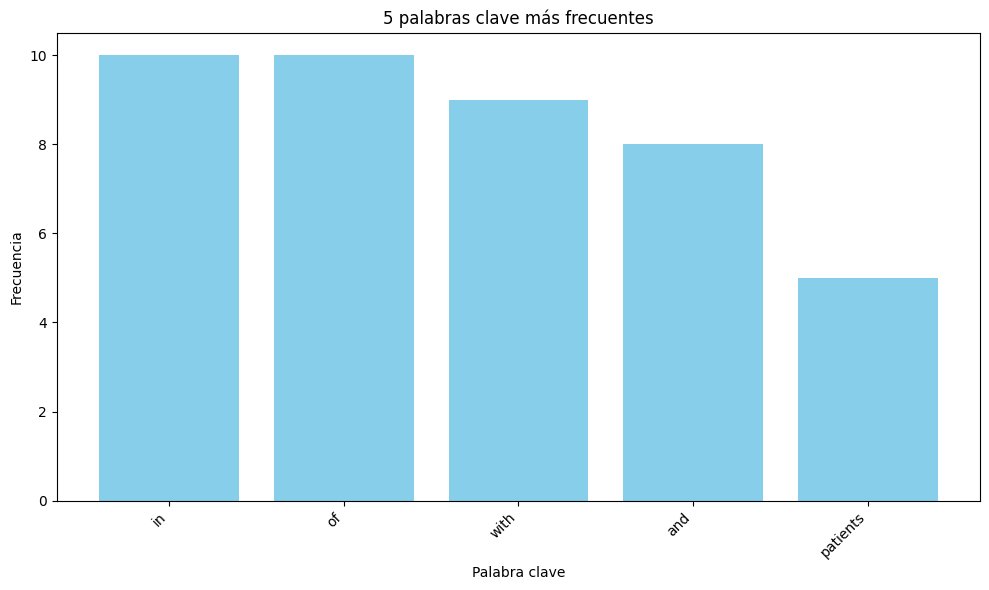

In [ ]:
# Obtenemos las 5 palabras clave más frecuentes
top_palabras_clave = frecuencia_aparicion_ordenada.head(5)

# Graficamos las palabras clave más frecuentes
plt.figure(figsize=(10, 6))
plt.bar(top_palabras_clave['Palabra'], top_palabras_clave['Frecuencia'], color='skyblue')
plt.xlabel('Palabra clave')
plt.ylabel('Frecuencia')
plt.title('5 palabras clave más frecuentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Ejercicio 5: distribución de frecuencias según la ley de Zipf

La ley de Zipf es una observación empírica sobre la distribución de las frecuencias de las palabras en un lenguaje natural. Se basa en dos ideas principales:

* Distribución inversa: La frecuencia de aparición de una palabra es inversamente proporcional a su rango en una lista ordenada de todas las palabras del texto. Esto significa que las palabras más frecuentes tienen un menor rango y viceversa.

* Ley de los pequeños números: La frecuencia de una palabra es aproximadamente proporcional al inverso de su rango. En otras palabras, la frecuencia de la palabra es aproximadamente inversamente proporcional al rango de la palabra.

La función de la Ley de Zipf relaciona el rango de una palabra ($r$) con su frecuencia de aparición ($f$) mediante la siguiente expresión:

$f(r) = \frac{C}{r^s}$

dónde:
$f(r)$ es la frecuencia de la palabra en el rango $r$.
$C$ es una constante que depende del corpus de texto.
$s$ es el exponente de la Ley de Zipf, que suele ser aproximadamente entre 0,7 y 1,0 para los textos en inglés.


Esta función describe la relación entre el rango y la frecuencia de aparición de las palabras en un corpus de texto, siguiendo los principios de la Ley de Zipf.

Para comprobar si es cierto que los textos siguen la ley de Zipf, importaremos la declaración de independencia de Estados Unidos, y comprobaremos si la frecuencia de las palabras cuadra con la frecuencia esperada por la ley de Zipf

In [ ]:
# Subir archivo
from google.colab import files
uploaded = files.upload()

In [ ]:
# TODO: importar archivo
file_path = 'declaration-of-independence.txt'


In [ ]:
# Leemos el contenido del archivo
with open(file_path, 'r') as file:
    declaration_text = file.read()

# Mostramos
print(declaration_text)


                      Declaration of Independence

                   [Adopted in Congress 4 July 1776]



   The Unanimous Declaration of the Thirteen United States of America

When, in the course of human events, it becomes necessary for one people to 
dissolve the political bands which have connected them with another, and to 
assume among the powers of the earth, the separate and equal station to 
which the laws of nature and of nature's God entitle them, a decent respect 
to the opinions of mankind requires that they should declare the causes 
which impel them to the separation.

We hold these truths to be self-evident, that all men are created equal, 
that they are endowed by their Creator with certain unalienable rights, that 
among these are life, liberty and the pursuit of happiness. That to secure 
these rights, governments are instituted among men, deriving their just 
powers from the consent of the governed. That whenever any form of 
government becomes destructive of these

In [ ]:
# Eliminamos la puntuación utilizando expresiones regulares
declaration_text_clean = re.sub(r'[^\w\s]', '', declaration_text)

# Mostramos el texto limpio sin puntuación
print(declaration_text_clean)

                      Declaration of Independence

                   Adopted in Congress 4 July 1776



   The Unanimous Declaration of the Thirteen United States of America

When in the course of human events it becomes necessary for one people to 
dissolve the political bands which have connected them with another and to 
assume among the powers of the earth the separate and equal station to 
which the laws of nature and of natures God entitle them a decent respect 
to the opinions of mankind requires that they should declare the causes 
which impel them to the separation

We hold these truths to be selfevident that all men are created equal 
that they are endowed by their Creator with certain unalienable rights that 
among these are life liberty and the pursuit of happiness That to secure 
these rights governments are instituted among men deriving their just 
powers from the consent of the governed That whenever any form of 
government becomes destructive of these ends it is the ri

In [ ]:
# Frecuencia de las palabras ordenadas de más a menos
from collections import Counter

def top_freq_words(texto):
     # TODO: convertir el texto a lower
     texto_lower = texto.lower()
     # TODO: contar la frecuencia de las palabras
     word_freq = Counter(texto_lower.split())
     # TODO: ordenar la frecuencia en orden descendente
     sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
     return sorted_word_freq

# Palabras más frecuentes
sorted_word_freq = top_freq_words(declaration_text_clean)

# Palabras más frecuentes y sus frecuencias
for word, freq in sorted_word_freq[:10]:
    print(f'Palabra: {word}, Frecuencia: {freq}')

Palabra: of, Frecuencia: 80
Palabra: the, Frecuencia: 78
Palabra: to, Frecuencia: 65
Palabra: and, Frecuencia: 57
Palabra: for, Frecuencia: 29
Palabra: our, Frecuencia: 26
Palabra: in, Frecuencia: 21
Palabra: their, Frecuencia: 20
Palabra: has, Frecuencia: 20
Palabra: he, Frecuencia: 19


In [ ]:
# TODO: crear una dataframe con las frecuencias reales y las esperadas según la ley de Zipf
def create_df_zip(sorted_word_freq):
    # Crear un DataFrame con las palabras y sus frecuencias reales
    df = pd.DataFrame(sorted_word_freq, columns=['Palabra', 'Frecuencia Real'])

    # Calcular la frecuencia esperada según la ley de Zipf
    total_words = df['Frecuencia Real'].sum()
    df['Frecuencia Esperada'] = total_words / (df.index + 1)
    return df

df_zip = create_df_zip(sorted_word_freq)

In [ ]:
#TODO: muestra el df
print(df_zip)

      Palabra  Frecuencia Real  Frecuencia Esperada
0          of               80          1339.000000
1         the               78           669.500000
2          to               65           446.333333
3         and               57           334.750000
4         for               29           267.800000
..        ...              ...                  ...
535    pledge                1             2.498134
536      each                1             2.493482
537  fortunes                1             2.488848
538    sacred                1             2.484230
539     honor                1             2.479630

[540 rows x 3 columns]


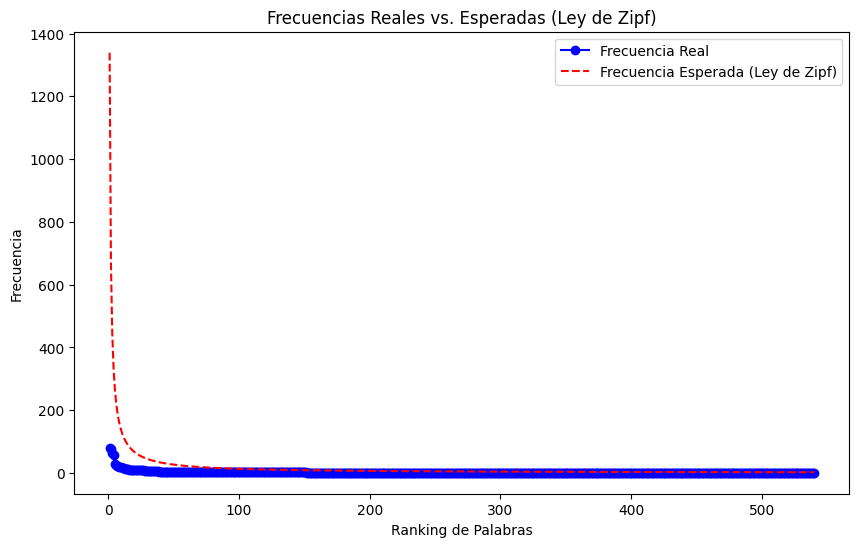

In [ ]:
# Frecuencias reales y las esperadas según la ley de Zipf

def plot_zipf(df_zip):
    # figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 6))

    # frecuencias reales
    ax.plot(df_zip.index + 1, df_zip['Frecuencia Real'], marker='o', linestyle='-', color='b', label='Frecuencia Real')

    # frecuencias esperadas según la ley de Zipf
    ax.plot(df_zip.index + 1, df_zip['Frecuencia Esperada'], linestyle='--', color='r', label='Frecuencia Esperada (Ley de Zipf)')

    # Etiquetas y título
    ax.set_xlabel('Ranking de Palabras')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencias Reales vs. Esperadas (Ley de Zipf)')

    # Leyenda
    ax.legend()

    # Mostrar la gráfica
    plt.show()

plot_zipf(df_zip)



Comenta qué ves en el gráfico. ¿Qué pasaría si sacáramos las stopwords del texto?

La línea azul (frecuencia real) se mantiene alrededor de 80 mientras que la línea roja (frecuencia esperada según la ley de Zipf) sube a 1339 en el eje de frecuencia, y ambas líneas llegan a 500 en el ranking de palabras, hay algunas interpretaciones posibles:

1) Desviación de la ley de Zipf: Esto sugiere que las frecuencias reales de las palabras en el texto no siguen la distribución esperada según la ley de Zipf.

2) Presencia de palabras muy frecuentes y menos frecuentes: La discrepancia entre las frecuencias reales y esperadas puede deberse a la presencia de algunas palabras extremadamente frecuentes en el texto que elevan la línea azul, mientras que otras palabras tienen frecuencias mucho más bajas de lo esperado según la ley de Zipf.

En cuanto a la eliminación de las stopwords del texto, esto podría cambiar la distribución de las frecuencias de las palabras. Las stopwords suelen ser palabras muy comunes que pueden distorsionar la distribución de las frecuencias. Al eliminarlas, es posible que la distribución se ajuste mejor a la ley de Zipf, ya que las stopwords tienden a tener frecuencias más altas de lo esperado según Zipf. Sin embargo, esto dependerá del texto específico y de la cantidad y tipo de stopwords presentes.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# TODO: Saca las stop words en inglés

def remove_stopwords(text):
    # stopwords en inglés
    english_stopwords = set(stopwords.words('english'))

    # Tokenizar el texto en palabras
    words = text.split()

    # Filtrar las palabras que no están en la lista de stopwords
    filtered_words = [word for word in words if word.lower() not in english_stopwords]

    # Unir las palabras filtradas de nuevo en un texto
    filtered_text = ' '.join(filtered_words)

    return filtered_text

# Suponiendo que declaration_text contiene el texto de la Declaración de Independencia
declaration_no_sw = remove_stopwords(declaration_text_clean)

# Mostrar el texto limpio sin stopwords
print(declaration_no_sw)

Declaration Independence Adopted Congress 4 July 1776 Unanimous Declaration Thirteen United States America course human events becomes necessary one people dissolve political bands connected another assume among powers earth separate equal station laws nature natures God entitle decent respect opinions mankind requires declare causes impel separation hold truths selfevident men created equal endowed Creator certain unalienable rights among life liberty pursuit happiness secure rights governments instituted among men deriving powers consent governed whenever form government becomes destructive ends right people alter abolish institute new government laying foundation principles organizing powers form shall seem likely effect safety happiness Prudence indeed dictate governments long established changed light transient causes accordingly experience hath shown mankind disposed suffer evils sufferable right abolishing forms accustomed long train abuses usurpations pursuing invariably object

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# TODO: vuelve a mostrar la tabla df y el gráfico al excluir las stopwords
freq_words = top_freq_words(declaration_no_sw)

# Mostrar las palabras más frecuentes y sus frecuencias
for word, freq in freq_words[:10]:
    print(f'Palabra: {word}, Frecuencia: {freq}')

Palabra: us, Frecuencia: 11
Palabra: people, Frecuencia: 10
Palabra: laws, Frecuencia: 9
Palabra: states, Frecuencia: 8
Palabra: right, Frecuencia: 7
Palabra: government, Frecuencia: 6
Palabra: among, Frecuencia: 5
Palabra: powers, Frecuencia: 5
Palabra: new, Frecuencia: 4
Palabra: colonies, Frecuencia: 4


In [ ]:
# TODO: Dibujar las frecuencias reales y las esperadas según la ley de Zipf (excluyendo las stopwords)

df_zip2 = create_df_zip(freq_words)
#TODO: muestra el df
print(df_zip2)

      Palabra  Frecuencia Real  Frecuencia Esperada
0          us               11           651.000000
1      people               10           325.500000
2        laws                9           217.000000
3      states                8           162.750000
4       right                7           130.200000
..        ...              ...                  ...
465  mutually                1             1.396996
466    pledge                1             1.394004
467  fortunes                1             1.391026
468    sacred                1             1.388060
469     honor                1             1.385106

[470 rows x 3 columns]


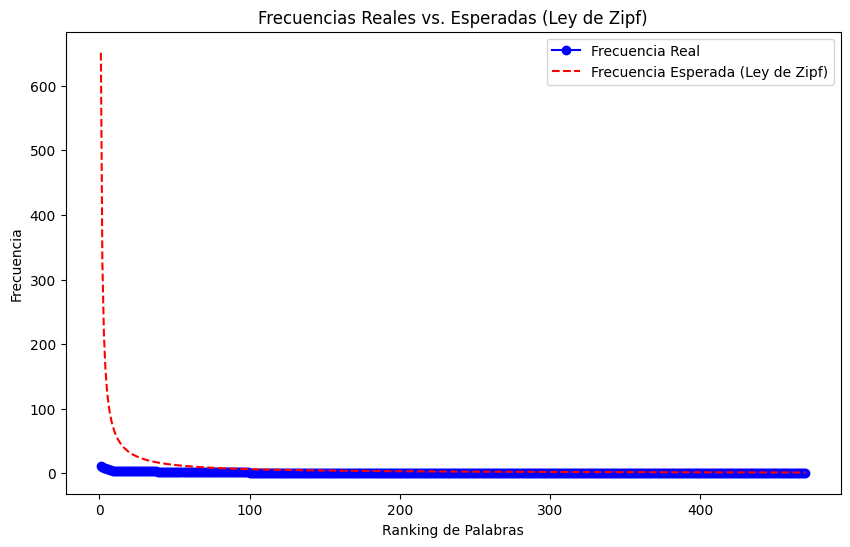

In [ ]:
plot_zipf(df_zip2)

Comenta: ¿qué gráfico tiene más sentido?

En ambos casos, hay una discrepancia significativa entre las frecuencias reales y las esperadas según la ley de Zipf. Sin embargo, la magnitud de esta discrepancia es mucho mayor en el primer gráfico, donde la diferencia entre las frecuencias reales y esperadas es mucho más pronunciada.

Desviación de la ley de Zipf: En ambos casos, las frecuencias reales no siguen la distribución esperada según la ley de Zipf. Sin embargo, la desviación parece ser más extrema en el primer gráfico, donde la diferencia entre las frecuencias reales y esperadas es mucho mayor.